# HIP2xyz
ヒッパルコス星表の球面座標系を直交座標系に変換する。

## 前処理
距離データであるParallaxが抜けている星がいくつかある。  
抜けている部分は空白なので、以下のコマンドで除外した。  
`$ grep -v "      " BrowseTargets.1213.1536347830 > hippa.txt`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## データの読み込み
0から数えてname, parallax, vmag, ra_deg, dec_degの順にデータがある。  
今回は2~6番目のparallax, vmag, ra_deg, dec_degを読み込む。

In [2]:
hippa = np.loadtxt("hippa.txt", delimiter="|", skiprows=4, usecols=range(2, 6))
hippa

array([[  4.17      ,   7.84      , 149.16726051, -89.78245385],
       [  2.08      ,   6.82      , 218.87831588, -89.771696  ],
       [  2.39      ,   7.2       , 130.51854607, -89.4605018 ],
       ...,
       [  4.13      ,   8.93      , 309.69815611,  89.40653468],
       [  4.16      ,   8.12      ,   9.93427094,  89.44429274],
       [  6.77      ,   9.04      , 146.58251561,  89.56940851]])

In [3]:
hippa.shape

(117933, 4)

## 座標の変換, 保存

In [4]:
pos = np.empty((0, 3))

for i in hippa:
    if i[0] != 0:
        x = 1 / i[0] * np.cos(np.deg2rad(i[3])) * np.cos(np.deg2rad(i[2]))
        y = 1 / i[0] * np.cos(np.deg2rad(i[3])) * np.sin(np.deg2rad(i[2]))
        z = 1 / i[0] * np.sin(np.deg2rad(i[3]))
        pos = np.append(pos, np.array([[x, y, z]]), axis=0)
        
np.savetxt("hippa_pos.txt", pos)

## xy平面

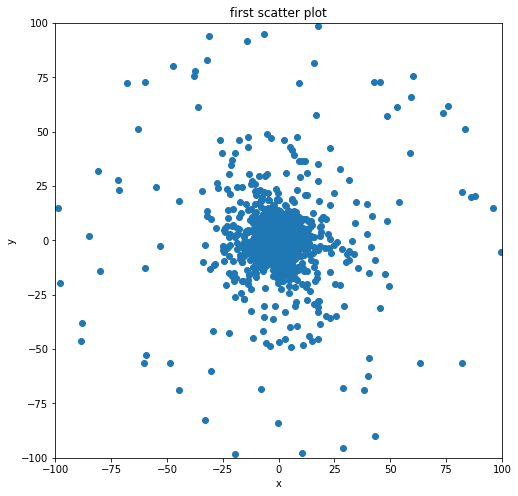

In [5]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlim(-100,100)
ax.set_ylim(-100,100)

ax.scatter(pos[0:,0], pos[0:,1])

ax.set_title('first scatter plot')
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

## xz平面

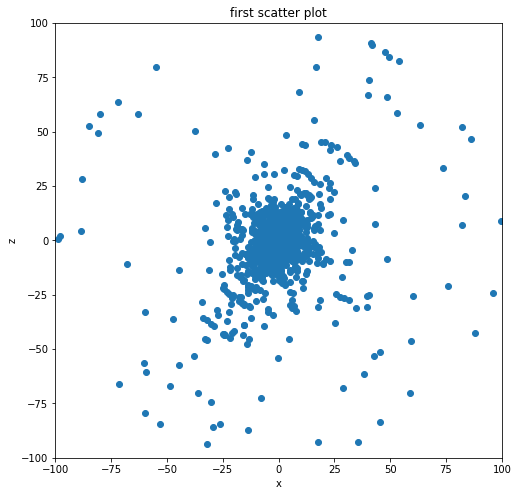

In [6]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlim(-100,100)
ax.set_ylim(-100,100)

ax.scatter(pos[0:,0], pos[0:,2])

ax.set_title('first scatter plot')
ax.set_xlabel('x')
ax.set_ylabel('z')

plt.show()

## yz平面

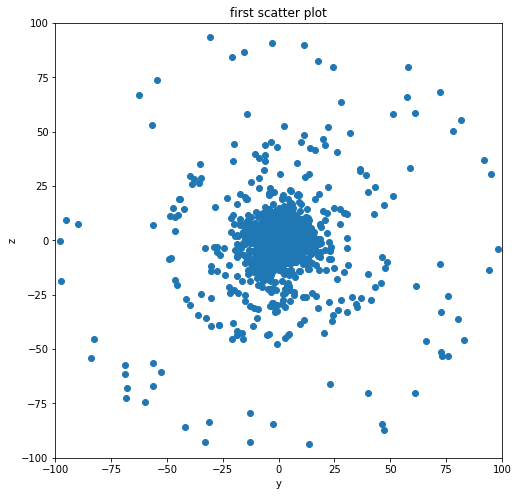

In [7]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlim(-100,100)
ax.set_ylim(-100,100)

ax.scatter(pos[0:,1], pos[0:,2])

ax.set_title('first scatter plot')
ax.set_xlabel('y')
ax.set_ylabel('z')

plt.show()

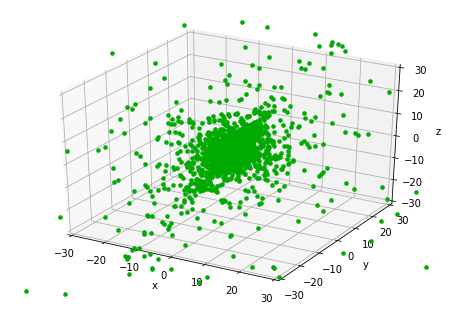

In [8]:
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlim(-30,30)
ax.set_ylim(-30,30)
ax.set_zlim(-30,30)
ax.plot(pos[0:,0], pos[0:,1], pos[0:,2], "o", color="#00aa00", ms=4, mew=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()